# Упражнение 1.2

In [72]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [73]:
from thinkdsp import CosSignal, SinSignal

In [74]:
from thinkdsp import read_wave
filename = 'gated-vocal-sample.wav'
sample = read_wave(filename)

In [75]:
sample.make_audio()

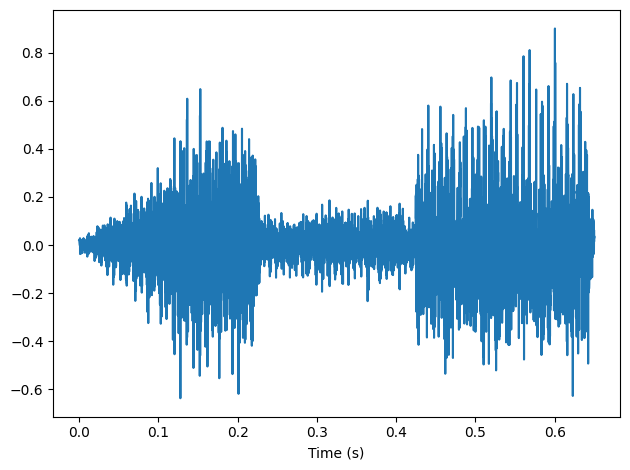

In [76]:
from thinkdsp import decorate
start = 0.0
duration = 0.65
segment = sample.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

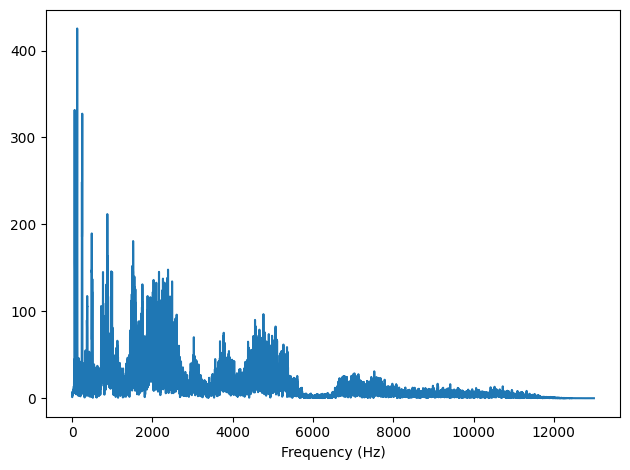

In [77]:
spectrum = segment.make_spectrum()
spectrum.plot(high=13000)
decorate(xlabel='Frequency (Hz)')

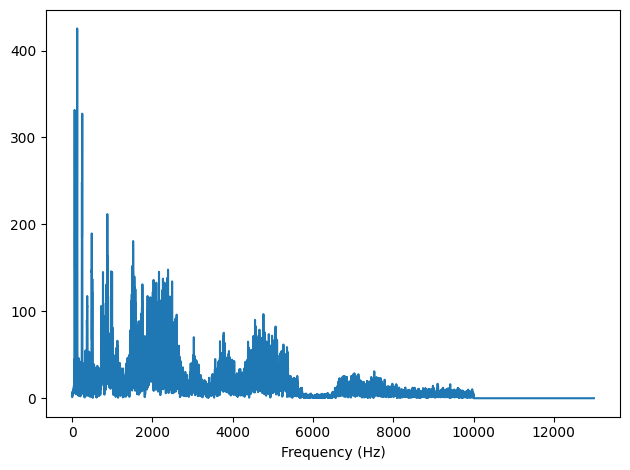

In [78]:
spectrum.low_pass(10000)
spectrum.plot(high=13000)
decorate(xlabel='Frequency (Hz)')

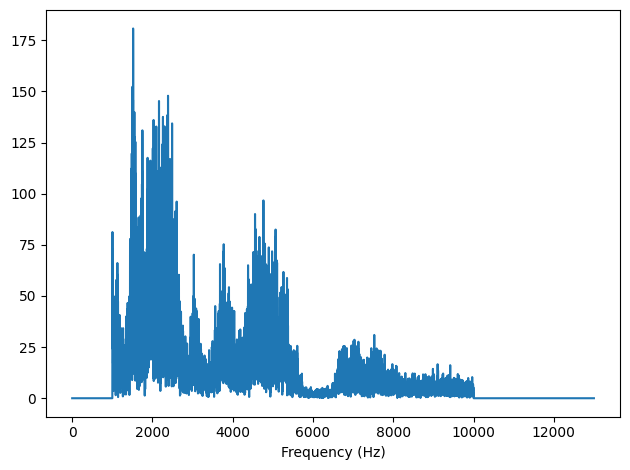

In [79]:
spectrum.high_pass(1000)
spectrum.plot(high=13000)
decorate(xlabel='Frequency (Hz)')

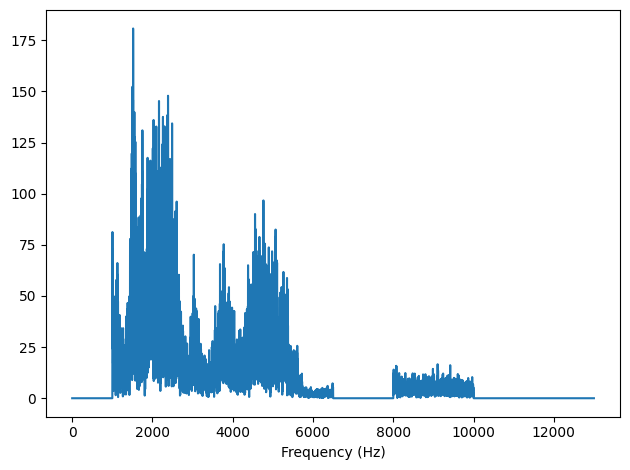

In [80]:
spectrum.band_stop(6500, 8000)
spectrum.plot(high=13000)
decorate(xlabel='Frequency (Hz)')

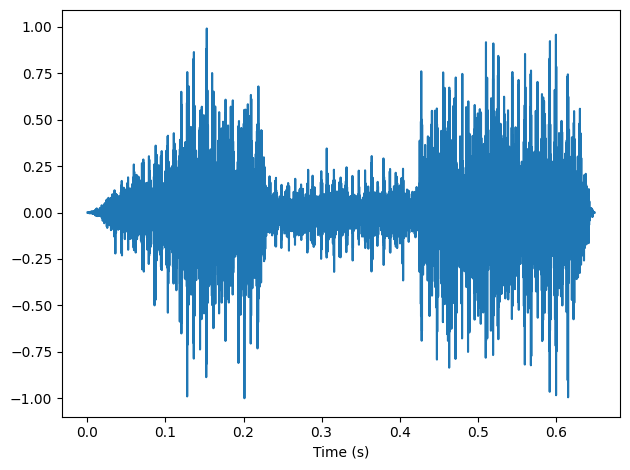

In [81]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

In [82]:
segment.make_audio()

In [83]:
filtered.make_audio()

In [84]:
filtered.write('filtered-result.wav')

Writing filtered-result.wav


# Упражнение 1.3

In [85]:
first = SinSignal(freq=800, amp=2.0, offset=0)
third = SinSignal(freq=800*5/4, amp=2.5, offset=0)
fifth = SinSignal(freq=800*6/4, amp=1.5, offset=0)
seventh = SinSignal(freq=800*7/4, amp=3.5, offset=0)

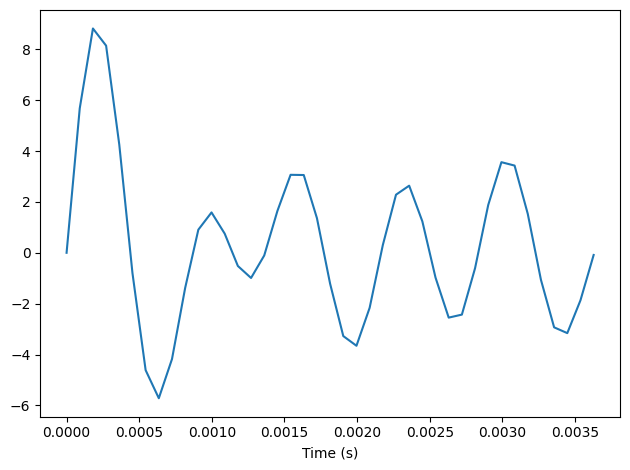

In [86]:
chord = first + third + fifth + seventh
chord.plot()
decorate(xlabel='Time (s)')

In [87]:
wave = chord.make_wave(duration=1.5, start=0, framerate=11025)
wave

In [88]:
wave.make_audio()

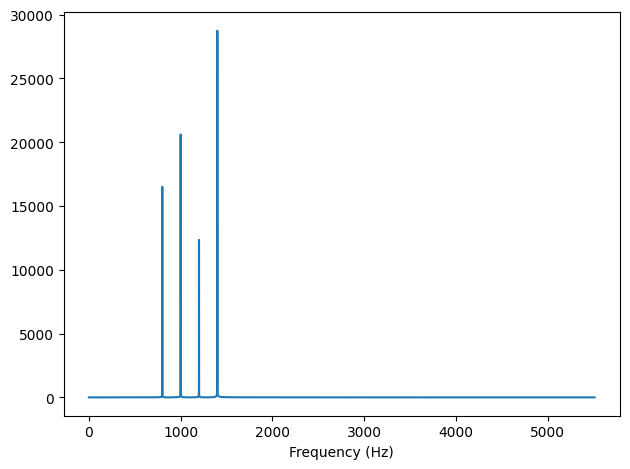

In [89]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

# Упражнение 1.4

In [90]:
def stretch(wave, stretch_coefficient):
  wave.ts *= stretch_coefficient
  wave.framerate /= stretch_coefficient

In [91]:
stretch(sample, 3.0)

In [92]:
sample.make_audio()